 Product Return Prediction App
Enter Purchase Amount: 100000
Enter Review Score (0 to 5): 5
Enter Days to Delivery: 1
 The product **will not be returned**.

 Data Visualizations


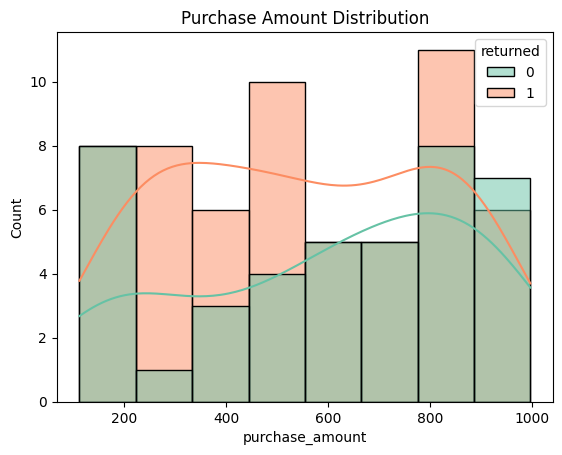

<ipython-input-25-5dcf05cc41b9>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='returned', y='review_score', palette='Set1', ax=ax2)
<ipython-input-25-5dcf05cc41b9>:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['No', 'Yes'])


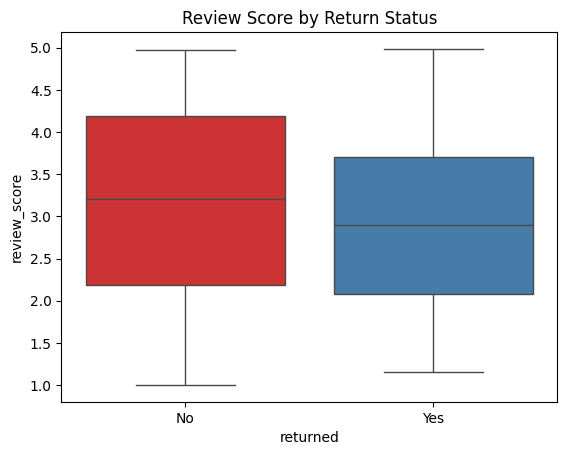

<ipython-input-25-5dcf05cc41b9>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='returned', y='days_to_delivery', palette='Set3', ax=ax3)
<ipython-input-25-5dcf05cc41b9>:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['No', 'Yes'])


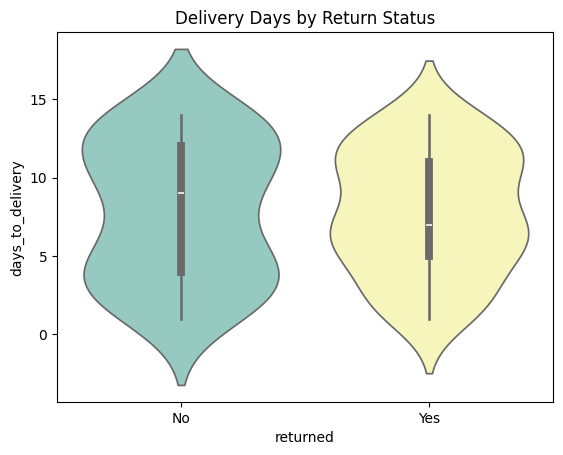

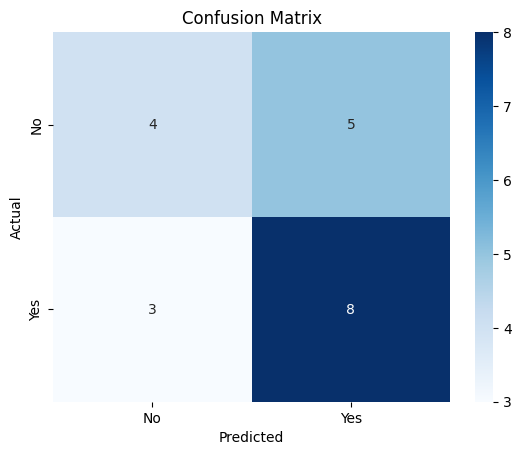


 Model Evaluation
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



In [25]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Load and preprocess data
def load_data():
    df = pd.read_csv("/content/product_return.csv")
    df = df.dropna(subset=['purchase_amount', 'review_score', 'days_to_delivery', 'returned'])
    df['returned'] = df['returned'].map({'yes': 1, 'no': 0})
    return df

df = load_data()

# Split data
X = df[['purchase_amount', 'review_score', 'days_to_delivery']]
y = df['returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model with class weights and hyperparameter tuning
model = RandomForestClassifier(random_state=42, class_weight='balanced')

#Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best model from grid search
best_model = grid_search.best_estimator_

#Predict using the best model
y_pred = best_model.predict(X_test)

#User input section
print(" Product Return Prediction App")

purchase_amount = float(input("Enter Purchase Amount: "))
review_score = float(input("Enter Review Score (0 to 5): "))
days_to_delivery = int(input("Enter Days to Delivery: "))

#Predict based on user input
user_input = pd.DataFrame({
    'purchase_amount': [purchase_amount],
    'review_score': [review_score],
    'days_to_delivery': [days_to_delivery]
})
prediction = best_model.predict(user_input)[0]

if prediction == 1:
    print(" The product **will be returned**.")
else:
    print(" The product **will not be returned**.")

#Show visualizations
print("\n Data Visualizations")

#1. Purchase Amount Distribution
fig1, ax1 = plt.subplots()
sns.histplot(df, x='purchase_amount', hue='returned', kde=True, palette='Set2', ax=ax1)
plt.title("Purchase Amount Distribution")
plt.show()

#2. Review Score vs Return
fig2, ax2 = plt.subplots()
sns.boxplot(data=df, x='returned', y='review_score', palette='Set1', ax=ax2)
ax2.set_xticklabels(['No', 'Yes'])
plt.title("Review Score by Return Status")
plt.show()

#3. Delivery Days vs Return
fig3, ax3 = plt.subplots()
sns.violinplot(data=df, x='returned', y='days_to_delivery', palette='Set3', ax=ax3)
ax3.set_xticklabels(['No', 'Yes'])
plt.title("Delivery Days by Return Status")
plt.show()

#4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig4, ax4 = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_xlabel("Predicted")
ax4.set_ylabel("Actual")
ax4.set_xticklabels(['No', 'Yes'])
ax4.set_yticklabels(['No', 'Yes'])
plt.title("Confusion Matrix")
plt.show()

#5. Classification report & Accuracy
print("\n Model Evaluation")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Load and preprocess data
def load_data():
    df = pd.read_csv("/content/product_return.csv")
    df = df.dropna(subset=['purchase_amount', 'review_score', 'days_to_delivery', 'returned'])
    df['returned'] = df['returned'].map({'yes': 1, 'no': 0})
    return df

df = load_data()

# Split data
X = df[['purchase_amount', 'review_score', 'days_to_delivery']]
y = df['returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model with class weights and hyperparameter tuning
model = RandomForestClassifier(random_state=42, class_weight='balanced')

#Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best model from grid search
best_model = grid_search.best_estimator_

#Predict using the best model
y_pred = best_model.predict(X_test)

#User input section
print(" Product Return Prediction App")

purchase_amount = float(input("Enter Purchase Amount: "))
review_score = float(input("Enter Review Score (0 to 5): "))
days_to_delivery = int(input("Enter Days to Delivery: "))

#Predict based on user input
user_input = pd.DataFrame({
    'purchase_amount': [purchase_amount],
    'review_score': [review_score],
    'days_to_delivery': [days_to_delivery]
})
prediction = best_model.predict(user_input)[0]

if prediction == 1:
    print(" The product **will be returned**.")
else:
    print(" The product **will not be returned**.")

#Show visualizations
print("\n Data Visualizations")

#1. Purchase Amount Distribution
fig1, ax1 = plt.subplots()
sns.histplot(df, x='purchase_amount', hue='returned', kde=True, palette='Set2', ax=ax1)
plt.title("Purchase Amount Distribution")
plt.show()

#2. Review Score vs Return
fig2, ax2 = plt.subplots()
sns.boxplot(data=df, x='returned', y='review_score', palette='Set1', ax=ax2)
ax2.set_xticklabels(['No', 'Yes'])
plt.title("Review Score by Return Status")
plt.show()

#3. Delivery Days vs Return
fig3, ax3 = plt.subplots()
sns.violinplot(data=df, x='returned', y='days_to_delivery', palette='Set3', ax=ax3)
ax3.set_xticklabels(['No', 'Yes'])
plt.title("Delivery Days by Return Status")
plt.show()

#4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig4, ax4 = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_xlabel("Predicted")
ax4.set_ylabel("Actual")
ax4.set_xticklabels(['No', 'Yes'])
ax4.set_yticklabels(['No', 'Yes'])
plt.title("Confusion Matrix")
plt.show()

#5. Classification report & Accuracy
print("\n Model Evaluation")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


 Product Return Prediction App
